In [1]:
! wget https://storage.googleapis.com/2022oct23/LoanStats_web.csv

--2022-10-25 14:04:24--  https://storage.googleapis.com/2022oct23/LoanStats_web.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.16.128, 172.217.15.112, 142.251.163.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.16.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1160243241 (1.1G) [text/csv]
Saving to: ‘LoanStats_web.csv’

LoanStats_web.csv   100%[===================>]   1.08G   233MB/s    in 5.1s    

2022-10-25 14:04:29 (216 MB/s) - ‘LoanStats_web.csv’ saved [1160243241/1160243241]



In [2]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Pandas options
pd.set_option('display.max_colwidth', 1000, 'display.max_rows', None, 'display.max_columns', None)

# Plotting options
%matplotlib inline
mpl.style.use('ggplot')
sns.set(style='whitegrid')

In [3]:
! pwd

/content


In [4]:
loans = pd.read_csv('LoanStats_web.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,19,55,112,123,124,125,128,129,130,133,138,139,140) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1432466 entries, 0 to 1432465
Columns: 144 entries, id to settlement_term
dtypes: float64(106), object(38)
memory usage: 1.5+ GB


In [6]:
loans.sample(5).transpose()

,91530,62414,637588,1014141,724273
id,NaN,NaN,NaN,NaN,NaN
member_id,NaN,NaN,NaN,NaN,NaN
loan_amnt,7200.0,15000.0,8000.0,9100.0,18000.0
funded_amnt,7200.0,15000.0,8000.0,9100.0,18000.0
funded_amnt_inv,7200.0,15000.0,8000.0,9100.0,18000.0
term,36 months,36 months,36 months,36 months,36 months
int_rate,13.67%,9.16%,13.99%,10.41%,12.74%
installment,244.93,478.12,273.39,295.39,604.24
grade,C,B,C,B,C
sub_grade,C3,B2,C3,B3,C1


#### ดึง target variable ออกมา

In [7]:
loans['loan_status'].value_counts(dropna=False)

Current               663690
Fully Paid            583755
Charged Off           152999
Late (31-120 days)     19455
In Grace Period         6136
Late (16-30 days)       4986
Default                 1419
NaN                       26
Name: loan_status, dtype: int64

#### ตัดเอาเฉพาะบางค่าของ target var.

##### Python: .loc[] ใช้ดึงข้อมูลมาดู แต่เนื่องจาก .loc[] ไม่ใช่ฟังก์ชั่นจึงใช้ [] โดยภายใน [] คือ index ของข้อมูล  .loc[] ต้องการ input 2 อย่าง (1) row index (required) และ (2) column index (optional)

In [8]:
loans = loans.loc[loans['loan_status'].isin(['Fully Paid', 'Charged Off'])]

In [9]:
loans.shape

(736754, 144)

In [10]:
loans['loan_status'].value_counts(dropna=False)

Fully Paid     583755
Charged Off    152999
Name: loan_status, dtype: int64

In [11]:
loans['loan_status'].value_counts()

Fully Paid     583755
Charged Off    152999
Name: loan_status, dtype: int64

#### คำนวณ Percentage of Null ในแต่ละ Attributes

In [12]:
missing_fractions = loans.isnull().mean().sort_values(ascending=False)

In [13]:
missing_fractions.head(10)

id                                            1.000000
next_pymnt_d                                  1.000000
url                                           1.000000
member_id                                     1.000000
desc                                          0.999974
orig_projected_additional_accrued_interest    0.994470
payment_plan_start_date                       0.991767
hardship_type                                 0.991767
hardship_reason                               0.991767
hardship_status                               0.991767
dtype: float64

Text(0, 0.5, 'Feature count')

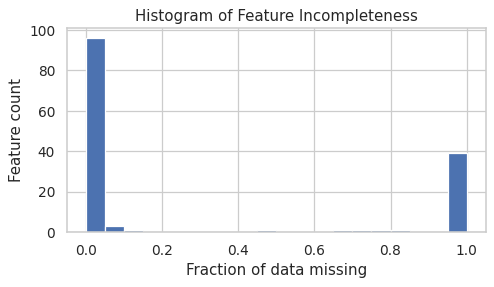

In [14]:
plt.figure(figsize=(6,3), dpi=90)
missing_fractions.plot.hist(bins=20)
plt.title('Histogram of Feature Incompleteness')
plt.xlabel('Fraction of data missing')
plt.ylabel('Feature count')

##### จากภาพแสดงว่า มี Attribute ที่ NULL เกินกว่า 40% เกินกว่า 40 ตัว

In [15]:
drop_list = sorted(list(missing_fractions[missing_fractions > 0.3].index))
print(drop_list)

['annual_inc_joint', 'debt_settlement_flag_date', 'deferral_term', 'desc', 'dti_joint', 'hardship_amount', 'hardship_dpd', 'hardship_end_date', 'hardship_last_payment_amount', 'hardship_length', 'hardship_loan_status', 'hardship_payoff_balance_amount', 'hardship_reason', 'hardship_start_date', 'hardship_status', 'hardship_type', 'id', 'member_id', 'mths_since_last_delinq', 'mths_since_last_major_derog', 'mths_since_last_record', 'mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq', 'next_pymnt_d', 'orig_projected_additional_accrued_interest', 'payment_plan_start_date', 'revol_bal_joint', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_mths_since_last_major_derog', 'sec_app_num_rev_accts', 'sec_app_open_acc', 'sec_app_open_act_il', 'sec_app_revol_util', 'settlement_amount', 'settlement_date', 'settlement_percentage', 'settlement_status', 'settlement_term', 'url', 'verific

In [16]:
len(drop_list)

44

In [17]:
loans.drop(labels=drop_list, axis=1, inplace=True)

In [18]:
loans.shape

(736754, 100)

#### Feature Selection with Business Perspective

In [19]:
print(sorted(loans.columns))

['acc_now_delinq', 'acc_open_past_24mths', 'addr_state', 'all_util', 'annual_inc', 'application_type', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'debt_settlement_flag', 'delinq_2yrs', 'delinq_amnt', 'dti', 'earliest_cr_line', 'emp_length', 'emp_title', 'funded_amnt', 'funded_amnt_inv', 'grade', 'hardship_flag', 'home_ownership', 'il_util', 'initial_list_status', 'inq_fi', 'inq_last_12m', 'inq_last_6mths', 'installment', 'int_rate', 'issue_d', 'last_credit_pull_d', 'last_pymnt_amnt', 'last_pymnt_d', 'loan_amnt', 'loan_status', 'max_bal_bc', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_rcnt_il', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'nu

##### ชื่อ attributes ที่เป็นที่รู้จักของ Investor ซึ่งต้องการให้ Lending Club ทำการประเมิน Charge off / Fully Paid

In [20]:
keep_list = ['addr_state', 'annual_inc', 'application_type', 'dti', 'earliest_cr_line', 'emp_length', 'emp_title', 'fico_range_high', 'fico_range_low', 'grade', 'home_ownership', 'id', 'initial_list_status', 'installment', 'int_rate', 'issue_d', 'loan_amnt', 'loan_status', 'mort_acc', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util', 'sub_grade', 'term', 'title', 'total_acc', 'verification_status', 'zip_code']

In [21]:
len(keep_list)

31

##### drop attribute ที่ไม่ได้อยู่ใน keep list ออกจาก loans dataframe

In [22]:
drop_list = [col for col in loans.columns if col not in keep_list]
print(drop_list)

['funded_amnt', 'funded_amnt_inv', 'pymnt_plan', 'delinq_2yrs', 'inq_last_6mths', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_

In [23]:
len(drop_list)

72

In [24]:
loans.drop(labels=drop_list, axis=1, inplace=True)

In [25]:
loans.shape

(736754, 28)

## EDA

In [26]:
def plot_var(arg_df, col_name, full_name, continuous):
    """
    Visualize a variable with and without faceting on the loan status.
    - col_name is the variable name in the dataframe
    - full_name is the full variable name
    - continuous is True if the variable is continuous, False otherwise
    """
    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,3), dpi=90)
    
    # Plot without loan status
    if continuous:
        sns.distplot(arg_df.loc[arg_df[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        sns.countplot(arg_df[col_name], order=sorted(arg_df[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(full_name)
    ax1.set_ylabel('Count')
    ax1.set_title(full_name)

    # Plot with loan status
    if continuous:
        sns.boxplot(x=col_name, y='loan_status', data=arg_df, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(full_name + ' by Loan Status')
    else:
        charge_off_rates = arg_df.groupby(col_name)['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']
        sns.barplot(x=charge_off_rates.index, y=charge_off_rates.values, color='#5975A4', saturation=1, ax=ax2)
        ax2.set_ylabel('Fraction of arg_df Charged-off')
        ax2.set_title('Charge-off Rate by ' + full_name)
    ax2.set_xlabel(full_name)
    
    plt.tight_layout()

In [27]:
print(list(loans.columns))

['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'application_type', 'mort_acc', 'pub_rec_bankruptcies']


#### id

In [28]:
#loans['id'].sample(5)

##### id มีค่าที่แตกต่างกันมากเกินไปจึง drop id ทิ้งไป (ไม่มี Pattern ใน id)

In [29]:
#loans['id'].describe()

In [30]:
#loans.drop('id', axis=1, inplace=True)

#### loan_amnt

In [31]:
loans['loan_amnt'].describe()

count    736754.000000
mean      14504.612089
std        9243.765872
min        1000.000000
25%        7200.000000
50%       12000.000000
75%       20000.000000
max       40000.000000
Name: loan_amnt, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


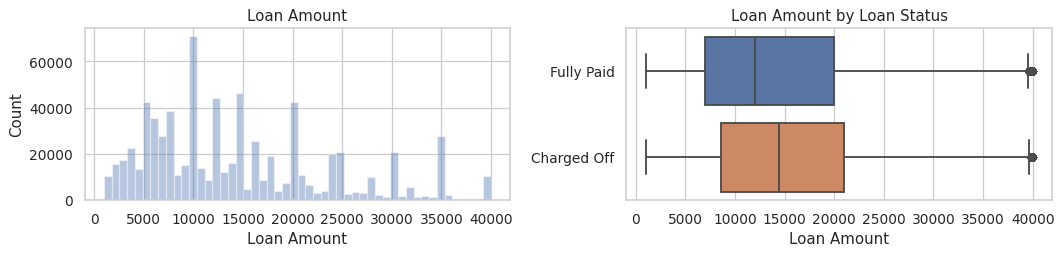

In [32]:
plot_var(loans,'loan_amnt', 'Loan Amount', continuous=True)

##### จาก BoxPlot เห็นว่า Charged Off มีแนวโน้มการปล่อยกู้แต่ละบัญชีในวงเงินที่สูงกว่า Fully Paid

##### และพบว่ากรณี mean ก็เช่นเดียวกัน

In [33]:
loans.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,152999.0,15848.418127,9336.441359,1000.0,8550.0,14400.0,21000.0,40000.0
Fully Paid,583755.0,14152.407859,9186.876762,1000.0,7000.0,12000.0,20000.0,40000.0


#### term

In [34]:
loans['term'].value_counts(dropna=False)

 36 months    580853
 60 months    155901
Name: term, dtype: int64

##### แปลงเป็น numeric

In [35]:
loans['term'] = loans['term'].apply(lambda s: np.int8(s.split()[0]))

In [36]:
loans['term'].value_counts(normalize=True)

36    0.788395
60    0.211605
Name: term, dtype: float64

In [37]:
loans.groupby('term')['loan_status'].value_counts(normalize=True)

term  loan_status
36    Fully Paid     0.825049
      Charged Off    0.174951
60    Fully Paid     0.670445
      Charged Off    0.329555
Name: loan_status, dtype: float64

##### ทั้งระยะเวลาของสัญญา 36, 60 เดือน มีคนที่เบี้ยวหนี้ทั้งคู่ แต่จะเห็นว่า 60 เดือน นั้นสูงกว่า

In [38]:
loans.groupby('term')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']

term
36    0.174951
60    0.329555
Name: loan_status, dtype: float64

#### int_rate

In [39]:
loans[:5]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,30000.0,36,9.75%,964.50,B,B3,NaN,NaN,MORTGAGE,89600.0,Verified,Mar-2016,Fully Paid,debt_consolidation,Debt consolidation,233xx,VA,21.15,Oct-1996,22.0,0.0,45643.0,64%,43.0,w,Individual,1.0,0.0
1,25000.0,36,5.32%,752.87,A,A1,Carman welder,10+ years,MORTGAGE,70000.0,Not Verified,Mar-2016,Fully Paid,debt_consolidation,Debt consolidation,758xx,TX,21.81,Jul-1983,16.0,0.0,4091.0,6.8%,54.0,w,Individual,1.0,0.0
2,6950.0,36,7.39%,215.84,A,A4,Reverse Mortgage Specialist,2 years,OWN,50000.0,Source Verified,Mar-2016,Fully Paid,home_improvement,NaN,331xx,FL,5.66,May-1995,5.0,4.0,7096.0,59.1%,26.0,w,Individual,8.0,3.0
3,28000.0,36,11.47%,922.93,B,B5,general manager,10+ years,MORTGAGE,75000.0,Not Verified,Mar-2016,Charged Off,debt_consolidation,NaN,229xx,VA,16.90,Aug-2001,10.0,0.0,27989.0,47.8%,29.0,w,Individual,5.0,0.0
4,7000.0,36,5.32%,210.81,A,A1,OPERATOR TECHNICIAN,7 years,MORTGAGE,110000.0,Not Verified,Mar-2016,Fully Paid,debt_consolidation,NaN,367xx,AL,6.37,Oct-2001,7.0,0.0,6978.0,50.6%,12.0,w,Individual,2.0,0.0


In [40]:
loans['int_rate'] = loans[['int_rate']].apply(lambda x: x.replace(regex=['%'],value=''))\
.astype('float64')

In [41]:
loans['int_rate'].describe()

count    736754.000000
mean         13.210859
std           5.158126
min           5.310000
25%           9.490000
50%          12.740000
75%          15.990000
max          30.990000
Name: int_rate, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


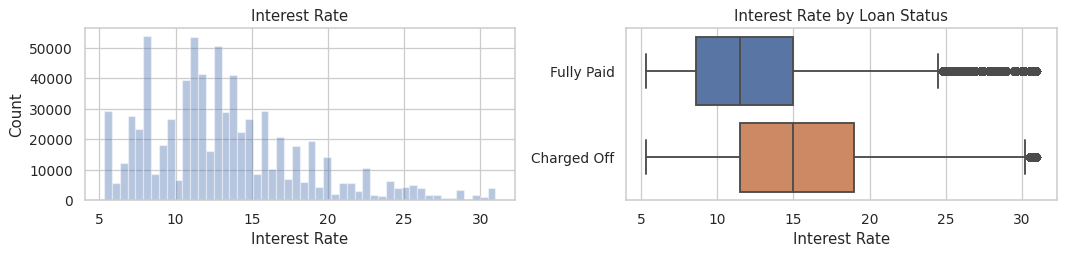

In [42]:
plot_var(loans,'int_rate', 'Interest Rate', continuous=True)

In [43]:
loans.groupby('loan_status')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,152999.0,15.864707,5.451607,5.31,11.49,14.99,18.99,30.99
Fully Paid,583755.0,12.515300,4.843605,5.31,8.59,11.49,14.99,30.99


#### installation

In [44]:
loans['installment'].describe()

count    736754.000000
mean        446.576084
std         282.946410
min          30.120000
25%         238.110000
50%         370.480000
75%         602.300000
max        1715.420000
Name: installment, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


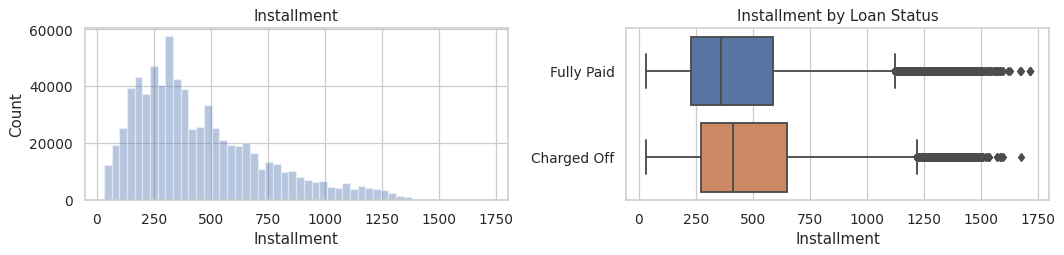

In [45]:
plot_var(loans,'installment', 'Installment', continuous=True)

In [46]:
loans.groupby('loan_status')['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,152999.0,486.490664,287.133256,30.12,273.39,413.00,651.25,1676.23
Fully Paid,583755.0,436.114690,280.902528,30.12,229.14,360.08,587.17,1715.42


#### grade, sub_grade

In [47]:
print(sorted(loans['grade'].unique()))

['A', 'B', 'C', 'D', 'E', 'F', 'G']


In [48]:
print(sorted(loans['sub_grade'].unique()))

['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']


In [49]:
loans.drop('grade', axis=1, inplace=True)

In [50]:
loans.groupby('sub_grade')['loan_status'].value_counts(normalize=True).sort_values(ascending=False)\
.loc[:,'Charged Off']

sub_grade
G4    0.560976
G5    0.548515
G2    0.536864
F5    0.535899
F4    0.528917
G3    0.524407
F2    0.497791
F3    0.484127
G1    0.482379
F1    0.467588
E5    0.445390
E4    0.417148
E3    0.405756
E2    0.387262
E1    0.381441
D5    0.363275
D4    0.347482
D3    0.331135
D1    0.309980
D2    0.306259
C5    0.275161
C4    0.262358
C3    0.241003
C2    0.225349
C1    0.205819
B5    0.176630
B4    0.158430
B3    0.139556
B2    0.123657
B1    0.113679
A5    0.088760
A4    0.073572
A3    0.065183
A2    0.056149
A1    0.035884
Name: loan_status, dtype: float64

In [51]:
loans.groupby('sub_grade')['loan_status'].value_counts(normalize=True).sort_values(ascending=False)\
.loc[:,'Fully Paid']

sub_grade
A1    0.964116
A2    0.943851
A3    0.934817
A4    0.926428
A5    0.911240
B1    0.886321
B2    0.876343
B3    0.860444
B4    0.841570
B5    0.823370
C1    0.794181
C2    0.774651
C3    0.758997
C4    0.737642
C5    0.724839
D2    0.693741
D1    0.690020
D3    0.668865
D4    0.652518
D5    0.636725
E1    0.618559
E2    0.612738
E3    0.594244
E4    0.582852
E5    0.554610
F1    0.532412
G1    0.517621
F3    0.515873
F2    0.502209
G3    0.475593
F4    0.471083
F5    0.464101
G2    0.463136
G5    0.451485
G4    0.439024
Name: loan_status, dtype: float64

In [52]:
loans['sub_grade'].value_counts(normalize=True).sort_values(ascending=False)

B5    0.073656
C1    0.072640
B4    0.062044
C2    0.059755
C4    0.058760
B1    0.057263
C3    0.056082
C5    0.054645
B3    0.053327
B2    0.052160
A1    0.043650
A5    0.040309
D1    0.039154
A4    0.037322
D2    0.032787
A2    0.028839
A3    0.028778
D3    0.028607
D4    0.022320
E1    0.016280
D5    0.016047
E2    0.011636
E3    0.009952
E4    0.009878
E5    0.009246
F1    0.006972
F2    0.003995
F3    0.003249
F4    0.002746
F5    0.002363
G1    0.001849
G2    0.001307
G3    0.000973
G4    0.000723
G5    0.000685
Name: sub_grade, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


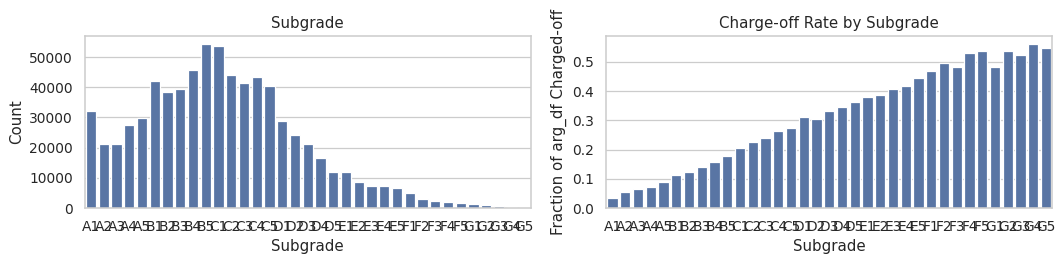

In [53]:
plot_var(loans,'sub_grade', 'Subgrade', continuous=False)

##### จากภาพแนวโน้มคนเบี้ยวหนี้เป็นไปตาม sub_grade ที่แย่ตามไปด้วย

In [54]:
loans['emp_length'].value_counts(dropna=False).sort_index()

1 year        49886
10+ years    247496
2 years       68493
3 years       60901
4 years       44489
5 years       45876
6 years       32116
7 years       24839
8 years       28125
9 years       26475
< 1 year      55912
NaN           52146
Name: emp_length, dtype: int64

##### แปลงเป็น numeric

In [55]:
loans['emp_length'].replace(to_replace='10+ years', value='10 years', inplace=True)

In [56]:
loans['emp_length'].replace('< 1 year', '0 years', inplace=True)

In [57]:
def emp_length_to_int(s):
    if pd.isnull(s):
        return s
    else:
        return np.int8(s.split()[0])

In [58]:
loans['emp_length'] = loans['emp_length'].apply(emp_length_to_int)

In [59]:
loans['emp_length'].value_counts(dropna=False).sort_index()

0.0      55912
1.0      49886
2.0      68493
3.0      60901
4.0      44489
5.0      45876
6.0      32116
7.0      24839
8.0      28125
9.0      26475
10.0    247496
NaN      52146
Name: emp_length, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


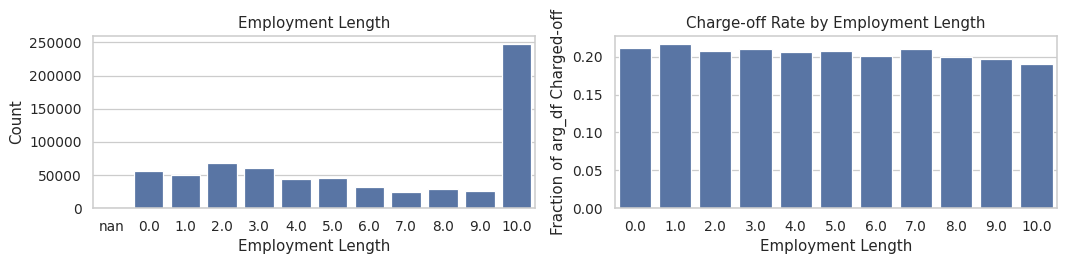

In [60]:
plot_var(loans,'emp_length', 'Employment Length', continuous=False)

##### ระยะเวลาการจ้างงานดูจะไม่ค่อยมีผลกับ Charged Off (แต่อาจต้องลอง drop การจ้างงาน 10 ปี ออก อาจจะเห็นผลเปลี่ยนไป)

In [61]:
filter_cond = loans['emp_length'] <10

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


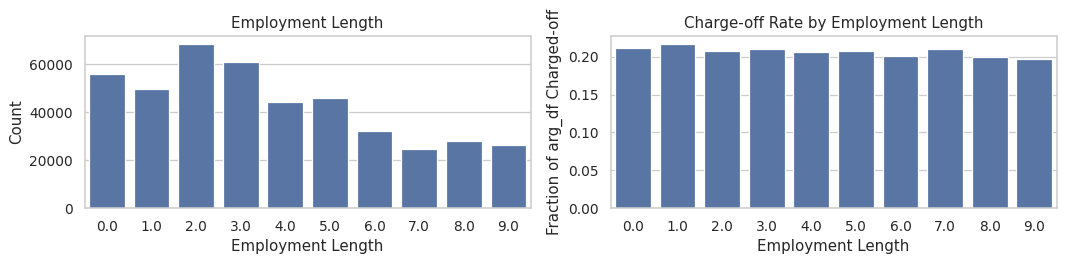

In [62]:
plot_var(loans[filter_cond],'emp_length', 'Employment Length', continuous=False)

##drop การจ้างงาน 10 ปี ออก ยังไม่เห็นผลเปลี่ยนไป)

#### home_ownership

In [63]:
loans['home_ownership'].value_counts(dropna=False)

MORTGAGE    361978
RENT        284391
OWN          89156
ANY           1225
NONE             4
Name: home_ownership, dtype: int64

##### เปลี่ยนให้ any, none เป็น other

In [64]:
loans['home_ownership'].replace(['NONE', 'ANY'], 'OTHER', inplace=True)

In [65]:
loans['home_ownership'].value_counts(dropna=False)

MORTGAGE    361978
RENT        284391
OWN          89156
OTHER         1229
Name: home_ownership, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


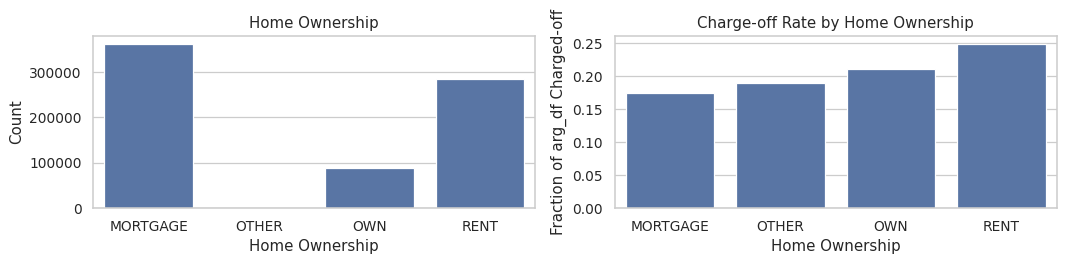

In [66]:
plot_var(loans,'home_ownership', 'Home Ownership', continuous=False)

In [67]:
loans.groupby('home_ownership')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']

home_ownership
MORTGAGE    0.174801
OTHER       0.190399
OWN         0.210676
RENT        0.248630
Name: loan_status, dtype: float64

##### จากภาพจะเห็นว่า คนเช่าบ้าน และมีบ้านเป็นของตนเอง มีโอกาสเบี้ยวหนี้สูงกว่า

#### annual_inc

In [68]:
loans['annual_inc'].describe()

count    7.367540e+05
mean     7.949849e+04
std      7.809475e+04
min      0.000000e+00
25%      4.800000e+04
50%      6.700000e+04
75%      9.500000e+04
max      9.573072e+06
Name: annual_inc, dtype: float64

##### รายได้ต่อปีของผู้ยื่นกู้ มี Range (max-min) ต่างกันมาก จึงควรลดความต่างของค่าลงด้วยการ take log **

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


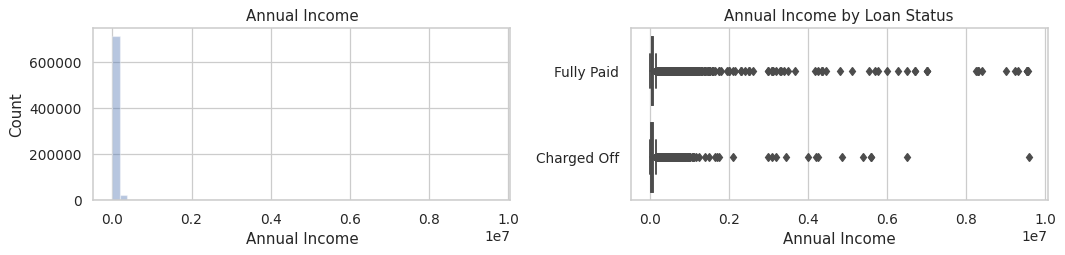

In [69]:
plot_var(loans,'annual_inc', 'Annual Income', continuous=True)

In [70]:
loans['log_annual_inc'] = loans['annual_inc'].apply(lambda x: np.log10(x+1))

In [71]:
loans['log_annual_inc'].describe()

count    736754.000000
mean          4.825744
std           0.270011
min           0.000000
25%           4.681250
50%           4.826081
75%           4.977728
max           6.981051
Name: log_annual_inc, dtype: float64

In [72]:
loans.drop('annual_inc', axis=1, inplace=True)

In [73]:
loans['log_annual_inc'].describe()

count    736754.000000
mean          4.825744
std           0.270011
min           0.000000
25%           4.681250
50%           4.826081
75%           4.977728
max           6.981051
Name: log_annual_inc, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


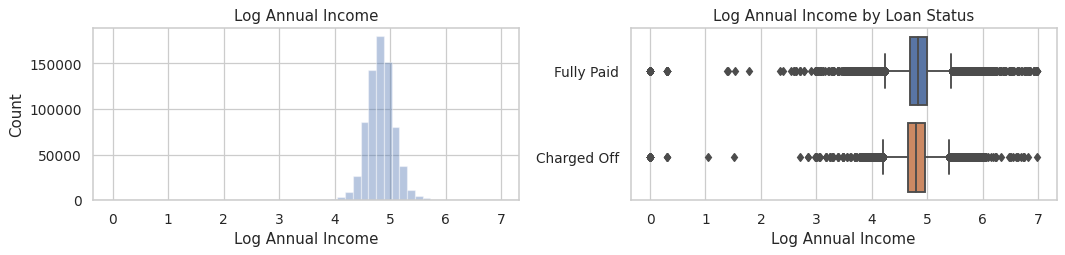

In [74]:
plot_var(loans,'log_annual_inc', 'Log Annual Income', continuous=True)

##### จากภาพจะเห็นว่า fully paid กับ charged off ไม่ต่างกันในเชิงรายได้ของผู้กู้

#### verification_status

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


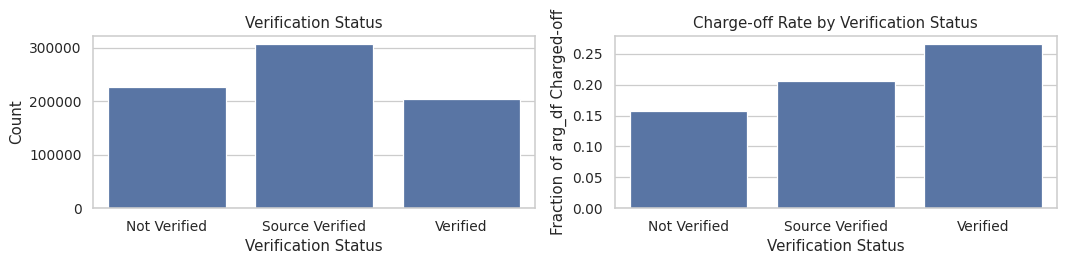

In [75]:
plot_var(loans,'verification_status', 'Verification Status', continuous=False)

##### จากภาพเห็นว่า จำนวนผู้กู้ที่เบี้ยวหนี้และ verified แล้ว มีจำนวนมากกว่า จำนวนผู้กู้ที่เบี้ยวหนี้แต่ยังไม่ verified

#### issue_d

##### เนื่องจาก ML Model จะถูกนำไปใช้ predict ว่า fully paid หรือ charged off ซึ่งเป็นการใช้ในช่วงก่อน loan issued แต่ issue_d เป็นข้อมูลหลังจาก loan issued แล้ว จึงควรไม่นำ issue_d มาเป็น feature

['term', 'installment', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies']

In [76]:
categorical = list(loans.select_dtypes('object').columns)

numerical = list(loans.select_dtypes('number').columns)

In [77]:
categorical

['sub_grade',
 'emp_title',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'revol_util',
 'initial_list_status',
 'application_type']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

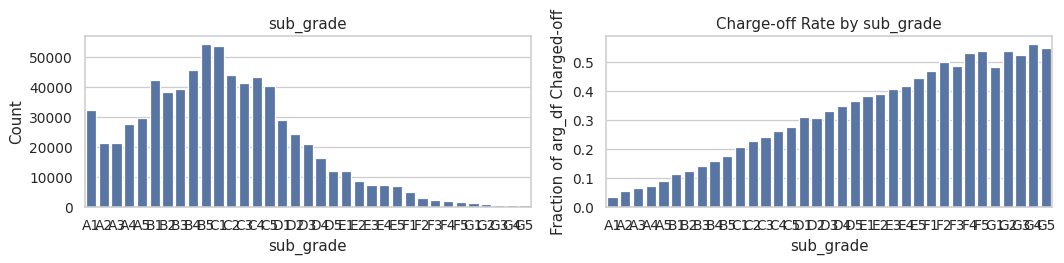

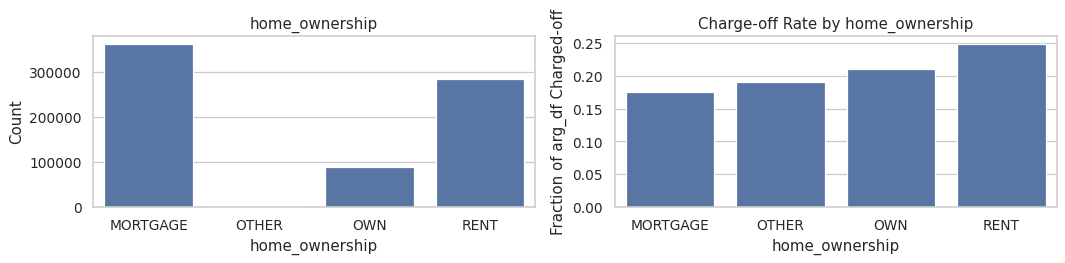

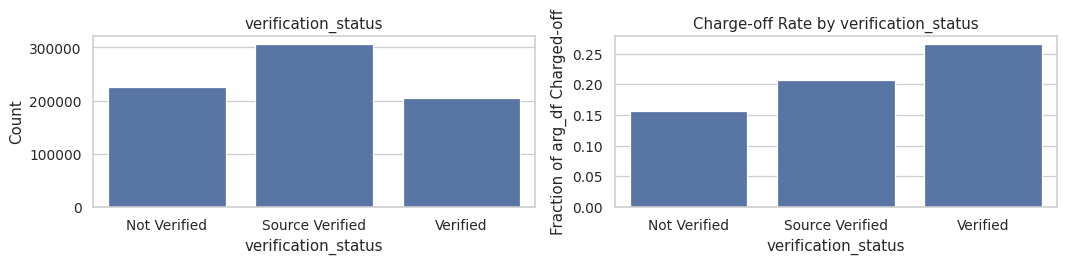

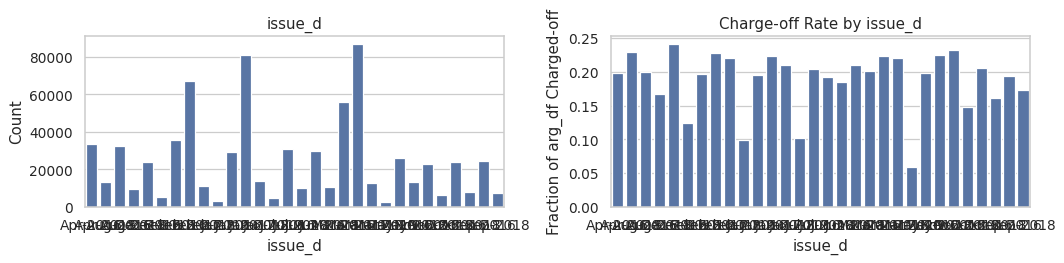

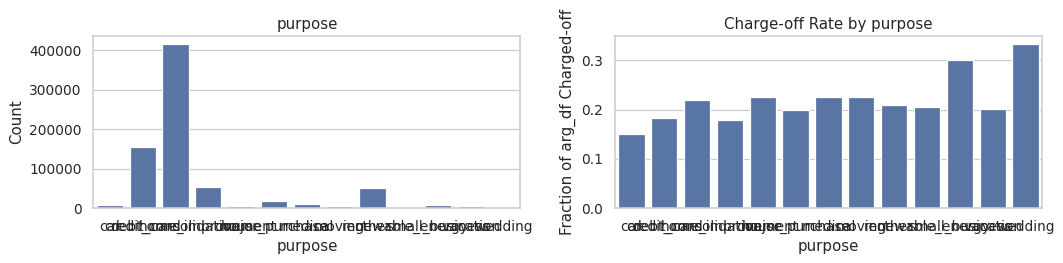

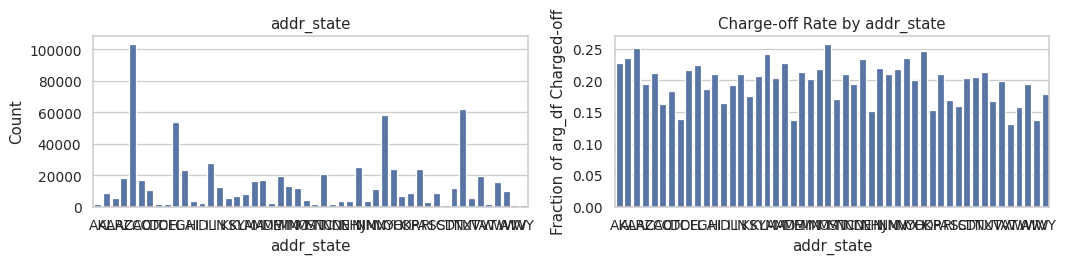

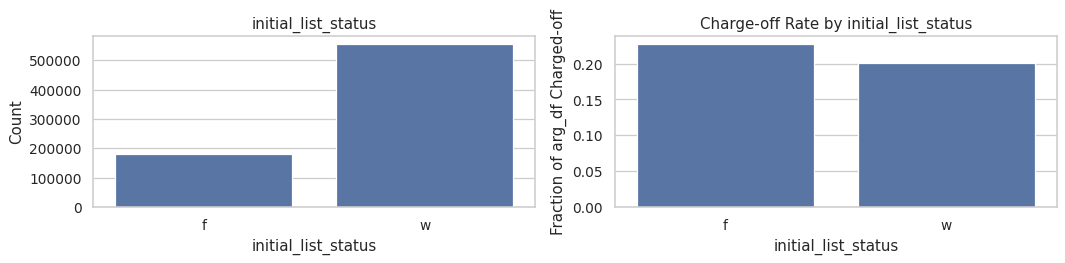

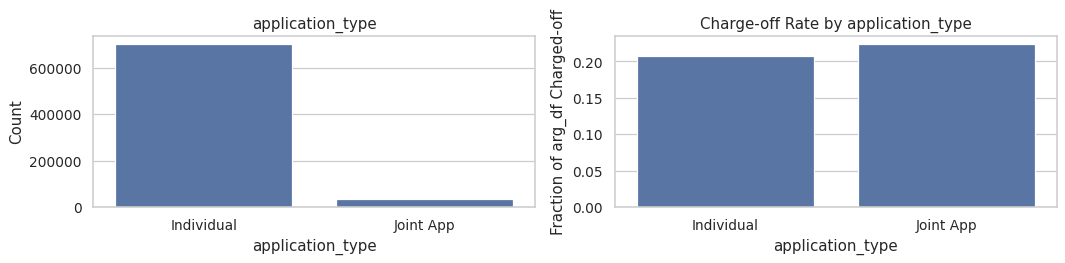

In [78]:
for ignoredCol in ['sub_grade',
 #'emp_title',
 'home_ownership',
 'verification_status',
 'issue_d',
 #'loan_status',
 'purpose',
 #'title',
 #'zip_code',
 'addr_state',
 #'earliest_cr_line',
 #'revol_util',
 'initial_list_status',
 'application_type']:
  plot_var(loans,  ignoredCol,  ignoredCol, continuous=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

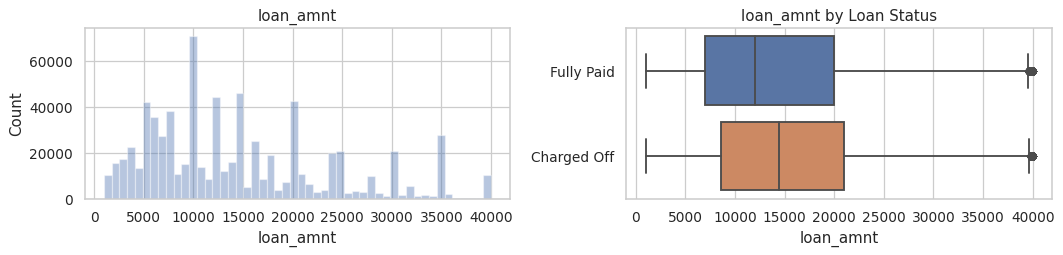

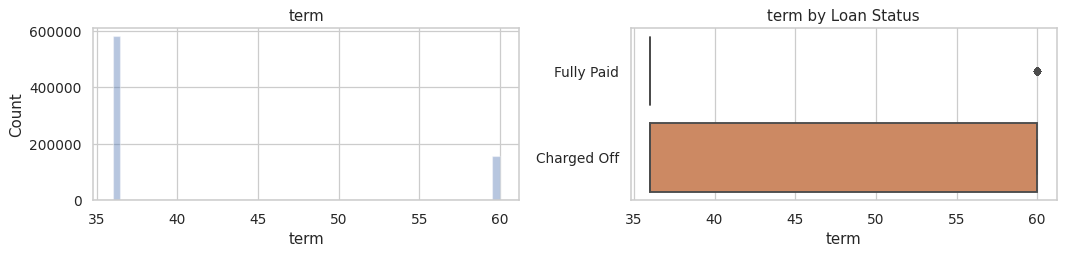

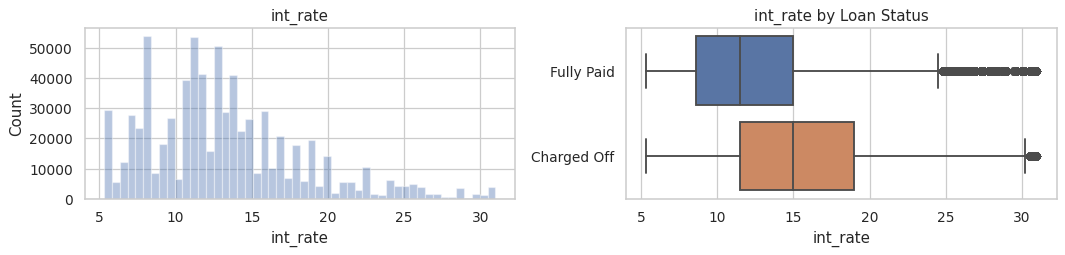

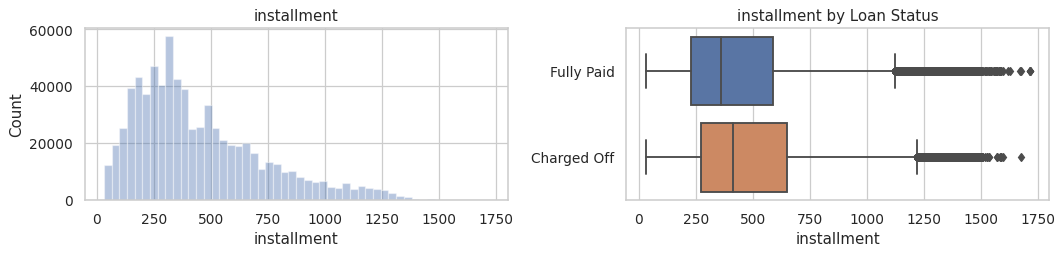

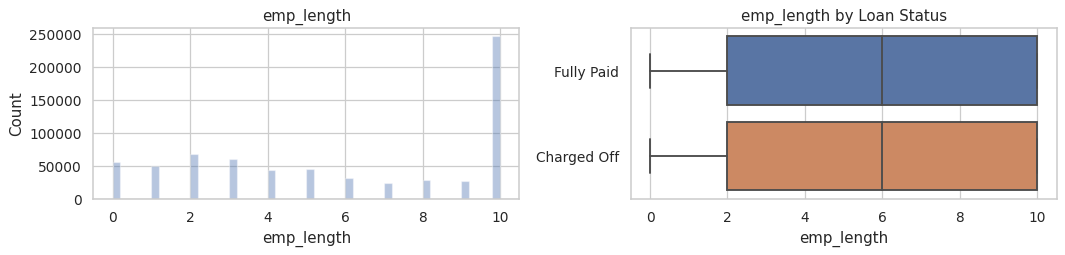

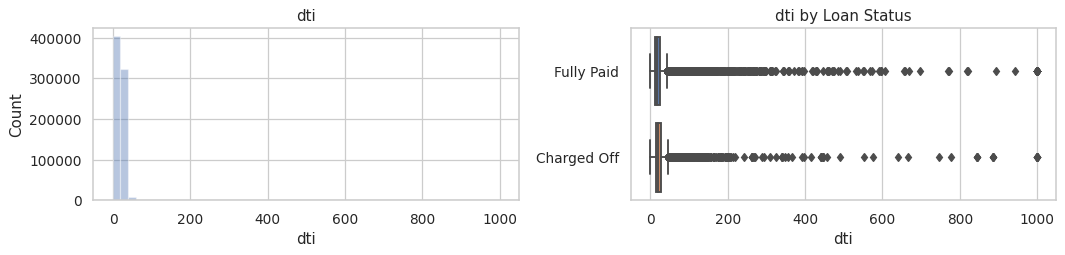

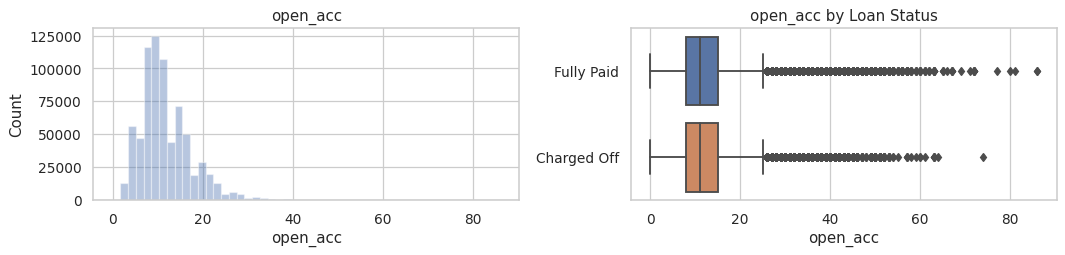

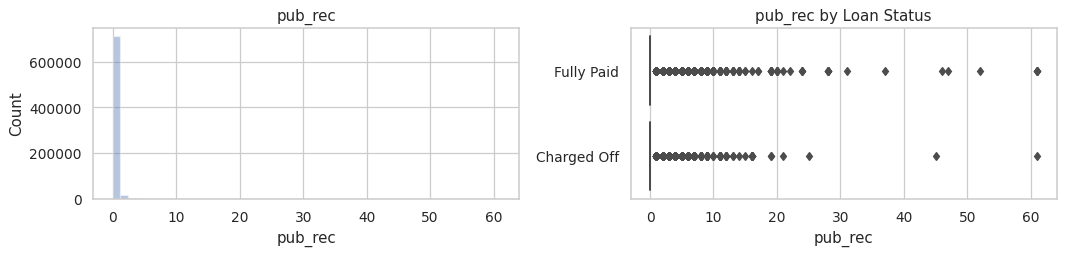

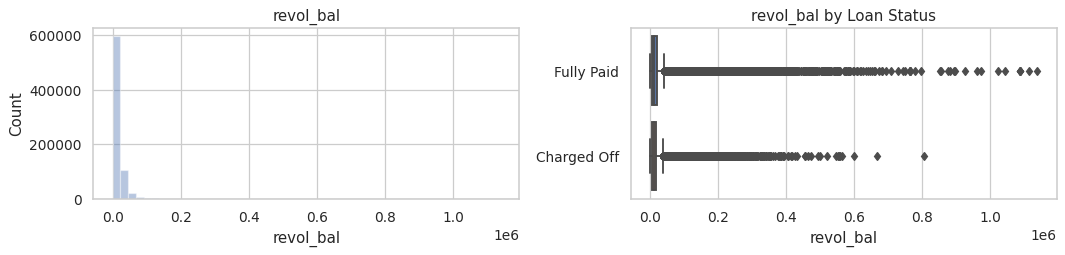

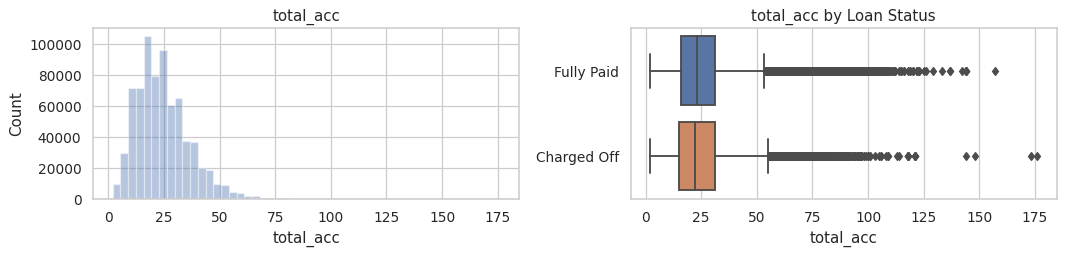

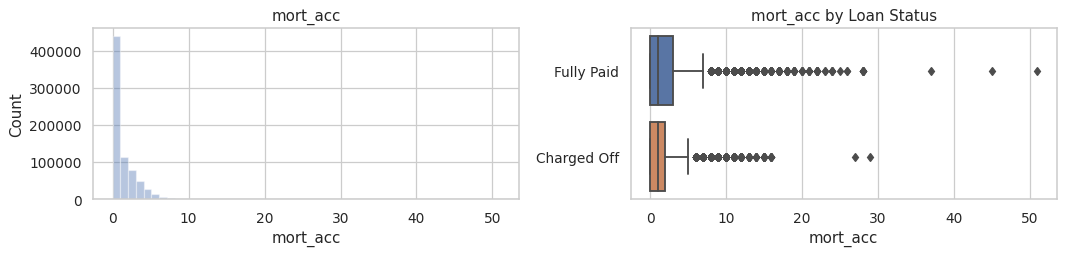

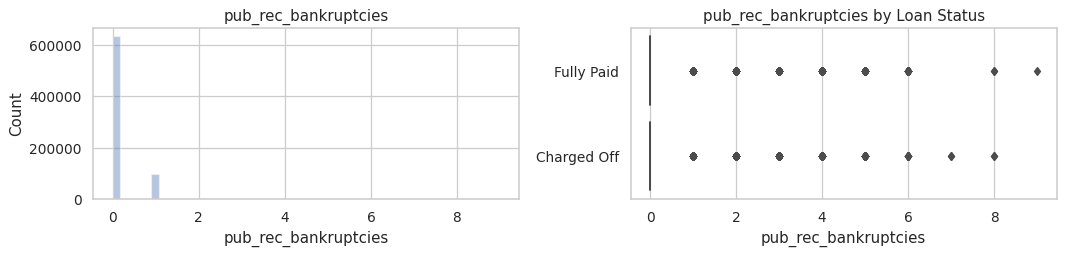

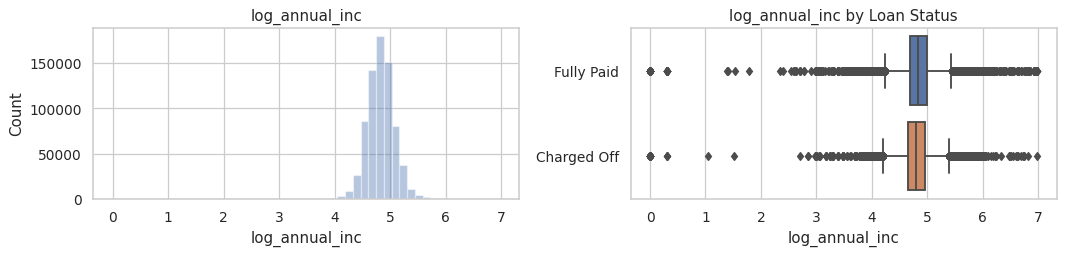

In [79]:
for ignoredCol in numerical:
  plot_var(loans,  ignoredCol,  ignoredCol, continuous=True)

## Preprocessing - เปลี่ยนให้เป็น numeric

In [80]:
loans['charged_off'] = (loans['loan_status'] == 'Charged Off').apply(np.uint8)
loans.drop('loan_status', axis=1, inplace=True)

In [81]:
loans.shape

(736754, 27)

#### ดูว่ามี Missing value มากน้อยแค่ไหน หากไม่มี Missing value ใน Categorical Var. ก็ไม่จำเป็นต้องใช้ NaN dummy variables

In [82]:
missing_fractions = loans.isnull().mean().sort_values(ascending=False) 

In [83]:
print(loans.columns)

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'verification_status',
       'issue_d', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'log_annual_inc', 'charged_off'],
      dtype='object')


In [84]:
loans.shape

(736754, 27)

In [85]:
loans.sample(5).transpose()

,324476,1057619,756816,89839,974964
loan_amnt,4200.0,4800.0,10000.0,8000.0,20000.0
term,36,36,60,36,60
int_rate,13.99,10.9,18.99,10.75,24.84
installment,143.53,156.92,259.36,260.97,585.16
sub_grade,C3,B4,D3,B4,E3
emp_title,service technician,Fiscal Assistant,Clerk Typist,Program Coordinator,TOPPING
emp_length,10.0,10.0,2.0,0.0,4.0
home_ownership,MORTGAGE,RENT,MORTGAGE,RENT,MORTGAGE
verification_status,Not Verified,Not Verified,Verified,Not Verified,Verified
issue_d,Jul-2016,Apr-2018,Mar-2017,Feb-2016,Jun-2018


## Train/Test Split

##### ใช้ข้อมูลเดือนปีเก่ามา train และใช้เดือนปีใหม่ๆ มา test

In [86]:
loans['issue_d'].sample(5)

197800     May-2016
775607     Feb-2017
1171209    Jul-2018
89814      Feb-2016
112150     Jan-2016
Name: issue_d, dtype: object

In [87]:
loans['issue_d'].isnull().any()

False

##### convert ให้เป็น datetime format

In [88]:
loans['issue_d'] = pd.to_datetime(loans['issue_d'])

In [89]:
loans['issue_d'].sample(5)

900009    2018-01-01
167721    2016-05-01
1043356   2018-04-01
151549    2016-06-01
1345123   2019-03-01
Name: issue_d, dtype: datetime64[ns]

In [90]:
loans['issue_d'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                  736754
unique                     30
top       2017-03-01 00:00:00
freq                    86864
first     2016-01-01 00:00:00
last      2019-03-01 00:00:00
Name: issue_d, dtype: object

##### ผลข้างบน แสดงให้เห็นว่า ในระยะเวลา 11 ปี มีแค่ 139 วัน ที่เป็นวันปล่อยกู้

Text(0.5, 1.0, 'Loans Funded per Year')

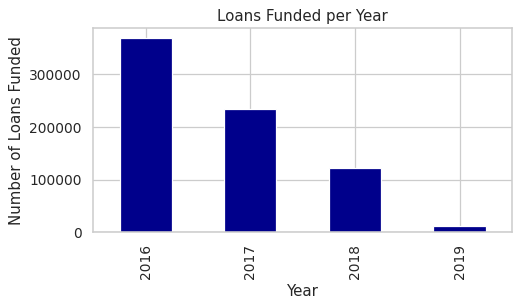

In [91]:
plt.figure(figsize=(6,3), dpi=90)
loans['issue_d'].dt.year.value_counts().sort_index().plot.bar(color='darkblue')
plt.xlabel('Year')
plt.ylabel('Number of Loans Funded')
plt.title('Loans Funded per Year')

##### ตัดแบ่งมาเป็น testing set เพียงแค่ 10%

In [92]:
loans_train = loans.loc[loans['issue_d'] <  loans['issue_d'].quantile(0.9)].sample(10000).dropna()
loans_test =  loans.loc[loans['issue_d'] >= loans['issue_d'].quantile(0.9)].sample(10000).dropna()

In [93]:
print('Number of loans in the partition:   ', loans_train.shape[0] + loans_test.shape[0])
print('Number of loans in the full dataset:', loans.shape[0])

Number of loans in the partition:    17942
Number of loans in the full dataset: 736754


In [94]:
loans_test.shape[0]

8896

In [95]:
loans_test.shape[0] / loans.shape[0]

0.01207458663271594

In [96]:
loans_train['issue_d'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                    9046
unique                     19
top       2017-03-01 00:00:00
freq                     1256
first     2016-01-01 00:00:00
last      2018-04-01 00:00:00
Name: issue_d, dtype: object

In [97]:
loans_test['issue_d'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                    8896
unique                     11
top       2018-05-01 00:00:00
freq                     1473
first     2018-05-01 00:00:00
last      2019-03-01 00:00:00
Name: issue_d, dtype: object

##### ไม่ใช้ issue_d ในการ train จึงลบทิ้งไป

In [98]:
loans_train.drop(['issue_d','log_annual_inc','emp_length'\
,'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'revol_util'\
, 'initial_list_status', 'application_type','emp_title'\
, 'loan_amnt','term','dti', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc','pub_rec_bankruptcies'], axis=1, inplace=True)
loans_test.drop(['issue_d','log_annual_inc','emp_length'\
,'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'revol_util'\
, 'initial_list_status', 'application_type','emp_title'\
, 'loan_amnt','term','dti', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc','pub_rec_bankruptcies'], axis=1, inplace=True)

In [99]:
y_train = loans_train['charged_off']
y_test = loans_test['charged_off']

In [100]:
X_train = loans_train.drop('charged_off', axis=1)
X_test = loans_test.drop('charged_off', axis=1)

In [101]:
del loans_train, loans_test

In [102]:
del loans

# 4. Modeling

## Random Forest Classifier

In [103]:
import pandas as pd
from seaborn import load_dataset
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

In [104]:
categorical = list(X_train.select_dtypes('object').columns)
print(f"Categorical columns are: {categorical}")

numerical = list(X_train.select_dtypes('number').columns)
print(f"Numerical columns are: {numerical}")

Categorical columns are: ['sub_grade', 'home_ownership', 'verification_status']
Numerical columns are: ['int_rate', 'installment', 'mort_acc']


In [105]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [106]:
# Define custom transformer
class ColumnSelector(BaseEstimator, TransformerMixin):
    """Select only specified columns."""
    def __init__(self, columns):
        self.columns = columns
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.columns]

# Define categorical pipeline
cat_pipe = Pipeline([('selector', ColumnSelector(categorical)),
                     ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                     ('encoder', OneHotEncoder(handle_unknown='ignore', sparse=False))])

# Define numerical pipeline
num_pipe = Pipeline([('selector', ColumnSelector(numerical))
                     #('imputer', SimpleImputer(strategy='median')),
                     #('scaler', MinMaxScaler())
                    ])

# Combine categorical and numerical pipeline
preprocessor = FeatureUnion(transformer_list=[('cat', cat_pipe),
                                              ('num', num_pipe)])

# Model Training
pipe = Pipeline(steps=[('preprocessor', preprocessor),
                       ('model', DecisionTreeClassifier(criterion="entropy", max_depth=None))])
pipeline_model = pipe.fit(X_train, y_train)

In [107]:
y_pred = pipeline_model.predict(X_test).flatten()


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (predict/actual):\n", pd.DataFrame(cm))


pipeline_model.score(X_test, y_test)

recall = np.diag(cm) / np.sum(cm, axis=1)
print("\nRecall:\n", pd.Series(recall))

precision = np.diag(cm) / np.sum(cm, axis=0)
print("\nPrecision:\n", pd.Series(precision))


from sklearn.metrics import f1_score
weighted_f1 = f1_score(y_test, y_pred, average="weighted")
print("\nF1 score:\n", weighted_f1)

Confusion Matrix (predict/actual):
       0     1
0  6038  1432
1  1003   423

Recall:
 0    0.808300
1    0.296634
dtype: float64

Precision:
 0    0.857549
1    0.228032
dtype: float64

F1 score:
 0.7401301322249978
